# Izhikevich neuron model

Figure 2a is generated together with figure 2b and 2c.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from seaborn import despine
from itertools import product as itproduct

In [3]:
from neuroprobnum.utils import plot_utils as pltu

# Select modes

In [4]:
# Select modes to generate data for.
neuron_modes = [
    'DAP',
]

# Generator

In [5]:
from neuroprobnum.models.izhikevich import INmodel, INParameters
from neuroprobnum.generator.generator_in import DataGeneratorIN

gens = {}

for neuron_mode in neuron_modes:
    neuron_parameters, stimulus_parameters, t_parameters = INParameters().select_mode(neuron_mode)
    neuron = INmodel(neuron_parameters, stimulus_parameters)
    tmax = t_parameters['tmax']

    # Generate solver instance.
    gens[neuron_mode] = DataGeneratorIN(
        y0=neuron.y0, t0=0.0, tmax=t_parameters['tmax'], gen_acc_sols=True,
        model=neuron, n_samples=40, n_parallel=20,
        base_folder='data'
    )
    gens[neuron_mode].subfoldername = neuron_mode
    gens[neuron_mode].load_acc_sols_from_file()    

Not acc sols file found!


## Generate data

In [6]:
# pert_method, adaptive, methods, step_params
solver_params = [
    ('abdulle_ln', 0, ['FE'], [0.5, 0.1, 0.02, 0.002]),
    ('abdulle_ln', 2, ['FE'], [0.5, 0.1, 0.02, 0.002]),
    
    ('conrad', 0, ['RKBS', 'RKDP'], [0.5, 0.1, 0.02, 0.002]),
    ('conrad', 2, ['RKBS', 'RKDP'], [0.5, 0.1, 0.02, 0.002]),
]

In [7]:
for neuron_mode, gen in gens.items():
    
    print('----------------------------------------------------------')
    print(neuron_mode, ':', gen.subfoldername)
    print('----------------------------------------------------------') 
    
    for pert_method, adaptive, methods, step_params in solver_params:
        for step_param, method in itproduct(step_params, methods):
            gen.gen_and_save_data(
                method=method, adaptive=adaptive, step_param=step_param,
                pert_method=pert_method, overwrite=False
            )

----------------------------------------------------------
DAP : DAP
----------------------------------------------------------
                                 FE_f(0.5)_abdulle_ln(1).pkl --> Generate data because file was not found.
No acc_sol found. Create reference solution!
2 times the following warning: inefficient
                                 FE_f(0.1)_abdulle_ln(1).pkl --> Generate data because file was not found.
                                FE_f(0.02)_abdulle_ln(1).pkl --> Generate data because file was not found.
                               FE_f(0.002)_abdulle_ln(1).pkl --> Generate data because file was not found.
                                FE_pf(0.5)_abdulle_ln(1).pkl --> Generate data because file was not found.
                                FE_pf(0.1)_abdulle_ln(1).pkl --> Generate data because file was not found.
                               FE_pf(0.02)_abdulle_ln(1).pkl --> Generate data because file was not found.
                              FE_pf

In [8]:
from neuroprobnum.generator.dataloader import DataLoader
import pandas as pd

df = pd.DataFrame()
for mode, gen in gens.items():
    mode_df = DataLoader(gen).load_data2dataframe(solver_params, drop_traces=False, MAEs=False, allowgenerror=False)
    mode_df['neuron'] = mode
    df = df.append(mode_df, ignore_index=True)
    
df['acc_n_spikes'] = df.acc_events.apply(lambda x: len(x[0]))
df['n_spikes'] = df.events.apply(lambda x: np.array([len(xi[0]) for xi in x]))

In [9]:
df.head()

,acc_events,acc_ts,acc_vs,adaptive,events,method,nODEcalls,n_samples,pert_method,pert_param,run_times,seed,step_param,t0,tmax,ts,vs,neuron,acc_n_spikes,n_spikes
0,"[[11.096424201422264, 14.818559816168397, 19.5...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06000000...","[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...",0,"[[[12.5]], [[12.5]], [[12.0, 17.5, 23.0]], [[]...",FE,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ...",40,abdulle_ln,1.0,"[0.012444734573364258, 0.010506391525268555, 0...","[12475674, 1080776788, 1858585705, 1629164900,...",0.500,0.0,50.0,"[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","[[-70.0, -69.99999999999999, -70.0, -69.999999...",DAP,8,"[1, 1, 3, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, ..."
1,"[[11.096424201422264, 14.818559816168397, 19.5...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06000000...","[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...",0,"[[[11.4, 15.700000000000001]], [[11.4, 15.6000...",FE,"[500, 500, 500, 500, 500, 500, 500, 500, 500, ...",40,abdulle_ln,1.0,"[0.06083345413208008, 0.05922365188598633, 0.0...","[12475674, 1080776788, 1858585705, 1629164900,...",0.100,0.0,50.0,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -7...",DAP,8,"[2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, ..."
2,"[[11.096424201422264, 14.818559816168397, 19.5...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06000000...","[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...",0,"[[[11.200000000000001, 15.26, 20.38, 26.900000...",FE,"[2500, 2500, 2500, 2500, 2500, 2500, 2500, 250...",40,abdulle_ln,1.0,"[0.1600632667541504, 0.2573730945587158, 0.225...","[12475674, 1080776788, 1858585705, 1629164900,...",0.020,0.0,50.0,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -7...",DAP,8,"[5, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 7, 6, 7, ..."
3,"[[11.096424201422264, 14.818559816168397, 19.5...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06000000...","[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...",0,"[[[11.104000000000001, 14.84, 19.638, 25.168, ...",FE,"[25000, 25000, 25000, 25000, 25000, 25000, 250...",40,abdulle_ln,1.0,"[1.5366449356079102, 1.5024466514587402, 1.505...","[12475674, 1080776788, 1858585705, 1629164900,...",0.002,0.0,50.0,"[0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012,...","[[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -7...",DAP,8,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
4,"[[11.096424201422264, 14.818559816168397, 19.5...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06000000...","[-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70...",2,"[[[12.419577212601757, 17.5054207269258, 25.69...",FE,"[106, 101, 101, 100, 104, 101, 103, 103, 107, ...",40,abdulle_ln,1.0,"[0.018940448760986328, 0.017142534255981445, 0...","[12475674, 1080776788, 1858585705, 1629164900,...",0.500,0.0,50.0,"[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","[[-70.0, -69.99999999999999, -70.0, -69.999999...",DAP,8,"[6, 1, 1, 0, 4, 1, 3, 3, 7, 6, 6, 3, 1, 3, 2, ..."


# Plots

In [10]:
def plot_n_spikes(ax, adaptive, methods, step_params, maketitle=True):
    """Plot number of spikes for different solver settings"""
    
    for idx_method, method in enumerate(methods):
        data_rows = df[(df.method==method) & (df.adaptive==adaptive)].sort_values('step_param', ascending=False)
        assert np.all(data_rows.step_param.values == step_params), f"{data_rows.step_param.values} {step_params}"

        n_spikes = data_rows.n_spikes.values
        
        assert data_rows.pert_method.nunique() == 1
        
        pltu.plot_percentiles(
            ax, data=n_spikes,
            positions=pltu.get_x_positions(n_positions=len(step_params), idx=idx_method, n_idxs=len(methods), offset=0.22),
            color=pltu.method2color(method),
            marker=pltu.method2marker(method),
            outl_kw=dict(clip_on=False),
            mean_kw=dict(clip_on=False, ms=4, ls='none', label=pltu.method2label(method=method, pert_method=data_rows.pert_method.iloc[0])),
            line_kw=dict(clip_on=False),
            connect=False,
        )
    
    assert data_rows.acc_n_spikes.nunique() == 1
    ax.axhline(data_rows.acc_n_spikes.iloc[0], c='grey', ls='--', zorder=-20)
        
        
    #if maketitle: ax.set_title(pltu.mode2label(adaptive))
    ax.set_xticks(np.arange(len(step_params)))
    ax.set_xticklabels([pltu.step_param2tick(step_param, adaptive) for step_param in step_params])
    ax.set_ylabel('No. spikes')
    ax.set_xlabel(pltu.mode2xlabel(adaptive, time_unit='ms'))

## Figure

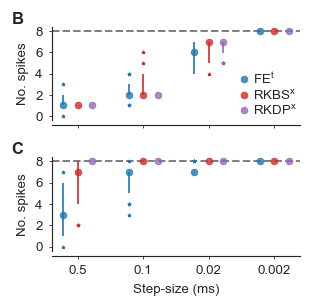

In [17]:
np.random.seed(777)

### Prepare axes ###
fig, axs = pltu.subplots(1, 2, xsize=pltu.TEXT_WIDTH/2, ysize=2.5, sharey='col', sharex='col', squeeze=True)
despine()

### Plot data ###
for ax, adaptive in zip(axs, [0, 2]):
    plot_n_spikes(ax=ax, adaptive=adaptive, methods=['FE', 'RKBS', 'RKDP'], step_params=step_params)

axs[0].set(yticks=[0, 2, 4, 6, 8])
    
### Decorate ### 
# Labels and ticks
pltu.set_labs(axs, panel_num_space=6, panel_nums=['B', 'C'], panel_num_va='top')
fig.align_labels(axs)

axs[0].set_xlabel(None)
    
# Adjust axis spacing
pltu.move_xaxis_outward(axs)
pltu.tight_layout(rect=(0.05,0.01,0.98,0.98), w_pad=1.5)

axs[0].legend(handlelength=0.8, loc='lower right')

pltu.savefig("fig8b_c")

## Text

In [12]:
_df = df[['method', 'adaptive', 'step_param', 'n_spikes']].assign(mean_n_spikes=df.n_spikes.apply(np.mean), std_n_spikes=df.n_spikes.apply(lambda x: np.std(x, ddof=1)),
                                                                  q10_90_n_spikes=df.n_spikes.apply(lambda x: (np.percentile(x, q=10), np.percentile(x, q=90))))

In [13]:
_df[(_df['step_param'] == 0.02) & (_df.adaptive == 0)].sort_values('method')

,method,adaptive,step_param,n_spikes,mean_n_spikes,std_n_spikes,q10_90_n_spikes
2,FE,0,0.02,"[5, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 7, 6, 7, ...",5.900,1.032796,"(4.0, 7.0)"
10,RKBS,0,0.02,"[7, 7, 7, 7, 6, 7, 7, 7, 4, 7, 7, 7, 5, 7, 7, ...",6.525,0.784056,"(5.0, 7.0)"
14,RKDP,0,0.02,"[7, 7, 7, 6, 5, 7, 7, 7, 7, 7, 6, 7, 7, 6, 5, ...",6.650,0.662164,"(5.9, 7.0)"


In [14]:
_df[(_df['step_param'] == 0.5) & (_df.adaptive == 2)].sort_values('method')

,method,adaptive,step_param,n_spikes,mean_n_spikes,std_n_spikes,q10_90_n_spikes
4,FE,2,0.5,"[6, 1, 1, 0, 4, 1, 3, 3, 7, 6, 6, 3, 1, 3, 2, ...",3.5,1.853617,"(1.0, 6.0)"
16,RKBS,2,0.5,"[8, 5, 4, 4, 8, 4, 8, 7, 8, 5, 7, 2, 6, 7, 7, ...",6.3,1.697661,"(4.0, 8.0)"
20,RKDP,2,0.5,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",8.0,0.000000,"(8.0, 8.0)"
